# HW05: Classification (due 2nd November)

**As part of NEXT WEEK'S homework (HW06) you will have to provide feedback to two of your classmates' essays on Eduflow.** On Eduflow, you will be automatically assigned to the two essays you have to provide feedback to on Friday, in case you want to start ahead.

In this homework, we focus again on a prediction task (as we did in week 3). Before diving into the coding part of the homework, I would like you to reflect on the following problem and how you would approach it.

*Suppose you are a policy advisor to a developing country government that would like to design a social security program to aid individuals with wages lower than \$1000 per month. However, data collection in this country is very hard due to the lack of technology infrastructures, incentives to misreport income, and geographical barriers. Therefore, you have access to some demographic and employment data at the individual level from all the municipalities in addition to geographical and municipality level features (here, you can be creative about which variables you have access to). However, you have access to income data only for a random set of municipalities.*

*How would you decide how to allocate the transfer using the methods you learned for this course? Be very specific on the method and the main variables you would use.*

**There is no right or wrong answer here. This is just a conceptual exercise to make you think about the methods we are learning about in real-life problems.** You don't need to write a lot about this; 100 words or even a scheme about your solution to this task would be enough.

## Coding Exercise

Another area of research that is increasingly employing machine learning is that of medical research (a great example of it is [Mullainathan and Obermeyer, 2021](https://www.nber.org/papers/w26168)). The correct prediction of who may encounter a critical clinical condition is fundamental for the allocation of treatments. Indeed, both treatment availability and doctors' time are not infinite. Therefore, correctly predicting who may be more likely to experience a heart attack or develop cancer is extremely important to help these people and not waste precious resources at the same time.

In the following, the main goal will be to predict the probability of a heart attack using some health indicators described below. **Note that these are fake data created following the pattern from a dataset with real health indicators.**

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('HW05.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**Attribute Information**

- age
- sex: 0 = female; 1 = male
- cp: chest pain type (4 values)
- trestbps: resting blood pressure
- chol: serum cholestoral in mg/dl
- fbs: fasting blood sugar > 120 mg/dl
- restecg: resting electrocardiographic results (values 0,1,2)
- thalach: maximum heart rate achieved
- exang: exercise induced angina
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
- target: 0= less chance of heart attack 1= more chance of heart attack

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Visualize the data

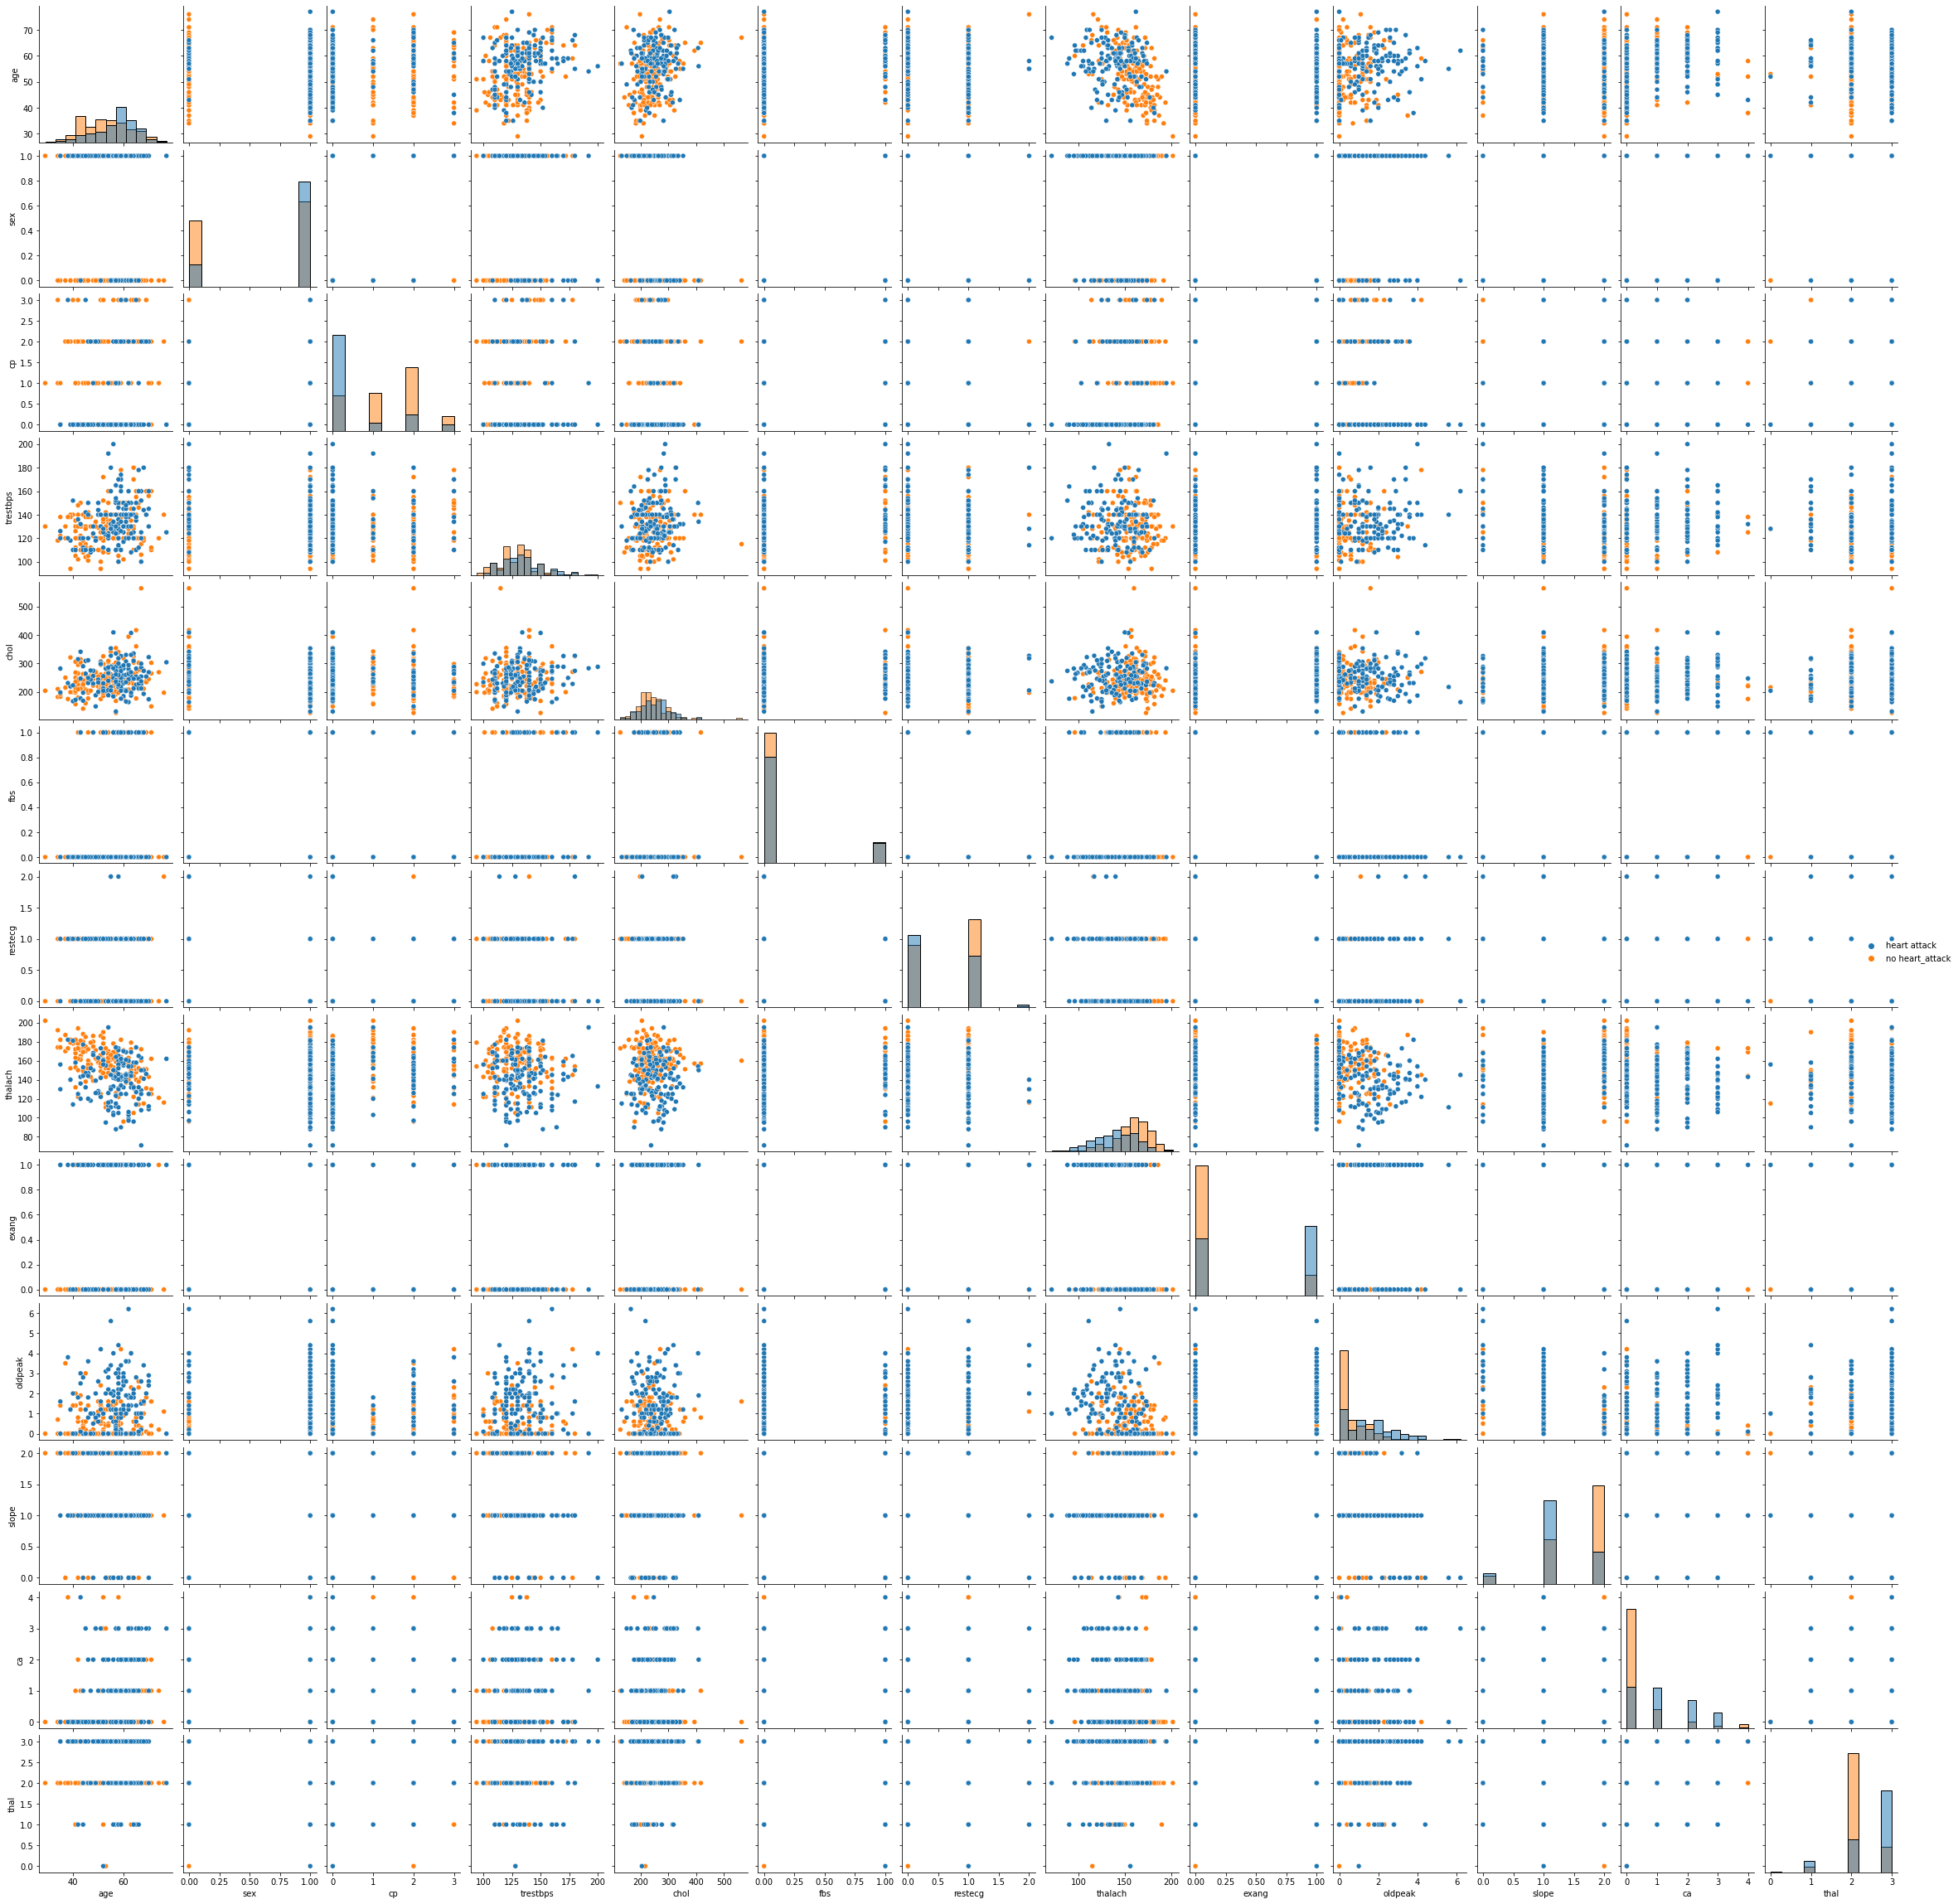

In [7]:
##TODO plot the dataset
#sns.set(style="ticks")

plot = sns.pairplot(df, hue="target", diag_kind="hist", diag_kws = dict(alpha=.5) );
plot._legend.set_title('')
new_labels = ['heart attack', 'no heart_attack']
for t, l in zip(plot._legend.texts, new_labels):
    t.set_text(l)

### XGboost

In this part you will build a classifier for the likelihood of having an heart attack using xgboost. You have to train, validate your classifier and print the most meaningful metrics.

In [9]:
import xgboost as xgb
from xgboost import XGBClassifier

# all columns up to the last one:
X = df.iloc[:, :-1]
# only the last column:
y = df.iloc[:, -1]

##TODO split the sample into a training, a test set and a validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

##TODO train a classifier using early stopping and the logloss evaluation metric 
xgb_class = XGBClassifier()
eval_set = [(X_val, y_val)]
xgb_class.fit(X_train, y_train, eval_metric="error", eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.285714
[1]	validation_0-error:0.285714
[2]	validation_0-error:0.285714
[3]	validation_0-error:0.285714
[4]	validation_0-error:0.285714
[5]	validation_0-error:0.285714
[6]	validation_0-error:0.285714
[7]	validation_0-error:0.285714
[8]	validation_0-error:0.285714
[9]	validation_0-error:0.306122
[10]	validation_0-error:0.306122
[11]	validation_0-error:0.306122
[12]	validation_0-error:0.306122
[13]	validation_0-error:0.265306
[14]	validation_0-error:0.244898
[15]	validation_0-error:0.265306
[16]	validation_0-error:0.265306
[17]	validation_0-error:0.265306
[18]	validation_0-error:0.265306
[19]	validation_0-error:0.265306
[20]	validation_0-error:0.265306
[21]	validation_0-error:0.265306
[22]	validation_0-error:0.265306
[23]	validation_0-error:0.244898
[24]	validation_0-error:0.244898
[25]	validation_0-error:0.244898
[26]	validation_0-error:0.244898
[27]	validation_0-error:0.244898
[28]	validation_0-error:0.244898
[29]	validation_0-error:0.244898
[30]	validation_0-er

XGBClassifier()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


accuracy             0.820


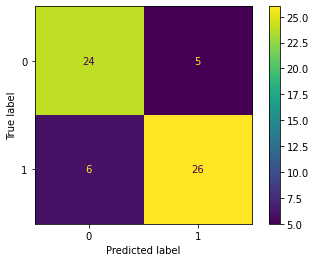

In [15]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

##TODO plot the confusion metrics and calculate the accuracy score
y_pred = xgb_class.predict(X_test)
plot_confusion_matrix(xgb_class,X_test, y_test)
print("{:20s} {:.3f}".format("accuracy", accuracy_score(y_test, y_pred)))

**What can you say about the performance of your classifier based on these metrics?**

The model can predict an unseen data point with an accuracy of 82%. We have more False Negatives than False Positives. Overall, our model performs better than random (50%), and due to early stopping, we ensure that there is no overfitting to the dataset. But, since we have lack of data, dividing it into validation and test sets reduce the amount of data we have, impacting the performance of our model.

**Which metrics are better suited to evaluate this model? Calculate and visualize these metrics, and comment on the performance of the model.** 

Since this is a very sensitive topic, predicting someone's heart attack possibility, we need to further investigate the model with the following metrics:
* Precision: how well do we do out of all the positive predicted samples?
* Recall: what's the ratio of true positives out of all the actual positives in the dataset
* F1 Score
* Recall vs Precision
* Balanced accuracy: especially if we do not have balanced data (i.e. because the heart attack occurs more rarely)
* ROC Curve



In [17]:
from sklearn.metrics import (precision_score, recall_score, f1_score, precision_recall_curve,
                             balanced_accuracy_score, roc_curve, auc, roc_auc_score)

print("{:20s} {:.3f}".format("precision", precision_score(y_test, y_pred)))
print("{:20s} {:.3f}".format("recall", recall_score(y_test, y_pred)))
print("{:20s} {:.3f}".format("f1", f1_score(y_test, y_pred)))

precision            0.839
recall               0.812
f1                   0.825


In [21]:
print("{:20s} {:.3f}".format("balanced accuracy", balanced_accuracy_score(y_test, y_pred)))

balanced accuracy    0.820


auc                  0.906


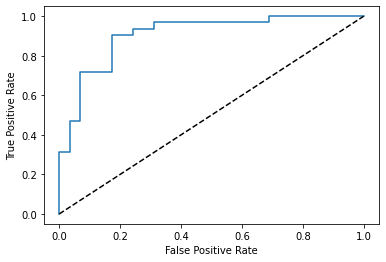

In [27]:
y_scores = xgb_class.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_scores)
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print("{:20s} {:.3f}".format("auc", roc_auc_score(y_test, y_scores)))

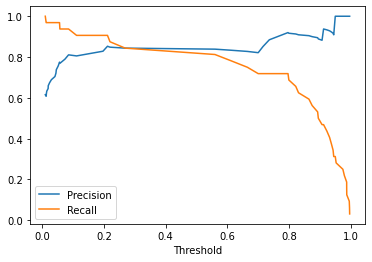

In [28]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)
plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel('Threshold')
plt.legend()

Based on the results, we can set the threshold to something lower than 0.5 to obtain better Precision - Recall balance. The AUC is 0.9 which is close enough to 1 and our current Recall is lower than the Precision. We can try to improve the precision.

**OPTIONAL QUESTION: Suppose that the classifier you built performs very well, would you suggest using it to decide on the allocation of treatments to preent heart attacks?**

I would want to use the classifier for this purpose, however, heart attack prediction is a very sensitive topic and we would not like to misclassify people. So we need to ensure that our generalization ability should be high and our recall should very low.